In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpMnuTVu\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpMnuTVu\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpMnuTVu\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpMnuTVu\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('New_ionStats.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(125)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(Spec_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$Spec_int)
model

[1] 0.9756098

Call:
lda(Spec_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.04878049 0.01219512 0.03658537 0.08536585 0.01219512 0.18292683 0.09756098 
         8          9 
0.01219512 0.51219512 

Group means:
           B11        Na23        Mg26        Al27        P31        S34
1  0.419293525  0.43362811 -0.66049923 -0.14862688  0.7578200  0.5808093
2  0.806167070  1.75380000  0.30198747 -0.07443720  1.4903948  1.8484311
3  2.193139400  1.37732746  0.08622486  0.50612503  2.0612569  1.1259974
4  0.803510280  0.72031339  0.37509764  0.02373085  1.0677898  0.7891702
5 -0.006453771  0.47296970 -1.17914240  2.84880690  1.8411720  0.9000044
6  1.094708215  0.74669889 -1.11741765 -0.07307052  0.5368457  1.0360572
7  0.802584947 -0.03085436 -0.68772637 -0.21180245  0.6392604  0.4468761
8  1.311630000  0.70814380 -0.29835212  0.02820811  0.2951914  0.4100215
9 -0.851022084 -0.51357721  0.38039369 -0.15539713 -

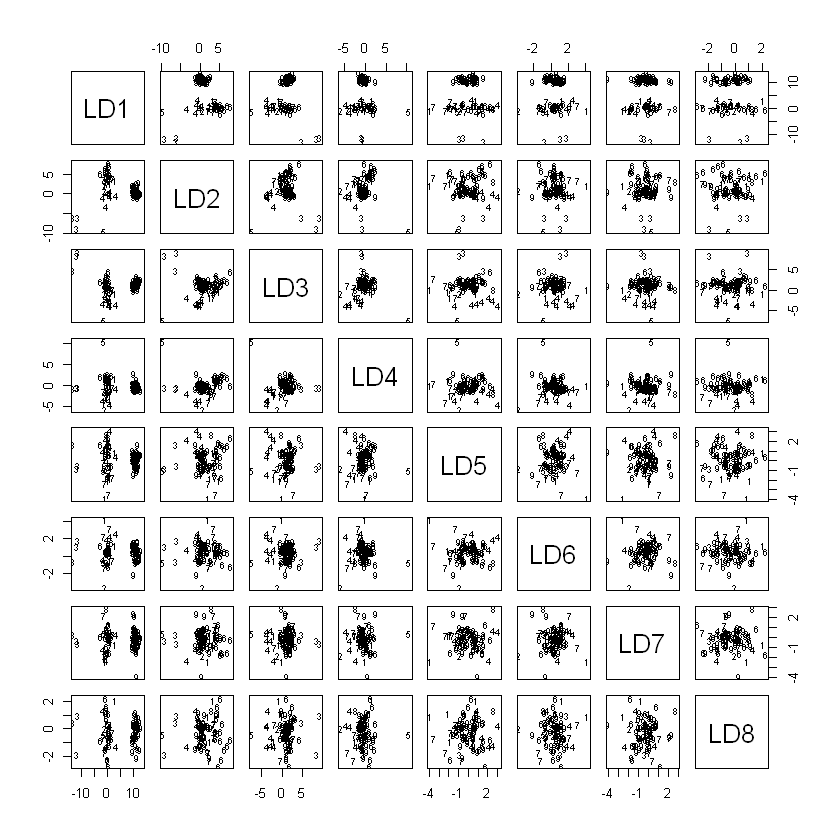

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 7 1 1 2 3
Levels: 1 2 3 4 5 6 7 8 9

,1,2,3,4,5,6,7,8,9
1,9.993007e-01,2.899934e-20,5.835302e-61,8.991844e-11,4.611816e-71,2.266123e-08,6.993020e-04,6.024378e-19,7.881789e-36
2,2.680330e-02,4.437143e-07,2.264090e-78,3.604609e-04,4.993273e-76,4.165752e-08,9.728357e-01,8.104444e-08,1.164356e-25
3,9.405456e-01,4.550114e-22,9.674304e-88,1.774132e-08,4.524058e-68,5.936826e-02,8.602891e-05,7.247616e-08,3.403249e-16
4,9.406399e-01,8.132619e-20,3.910067e-78,2.503341e-13,4.883645e-76,2.838380e-02,3.097633e-02,7.453443e-10,1.649311e-31
5,1.071233e-15,1.000000e+00,1.783991e-66,1.209371e-10,4.463382e-93,6.662719e-22,3.113163e-11,6.421720e-15,5.517018e-44
6,1.364125e-69,7.400489e-58,1.000000e+00,2.504651e-59,6.568452e-92,7.928150e-69,1.158987e-62,1.929300e-60,1.508767e-139


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8
1,-6.336005,0.6055758,-0.9755789,0.2638494,-3.9756137,3.6215988,-2.321319,1.1174673
2,-4.311903,1.1200052,-2.9792728,-2.2891527,-1.9068353,-1.0475632,0.363168,-0.6978324
3,-2.471741,1.9452495,-1.7926237,1.9290996,0.7638966,0.7111862,-0.526681,2.3164866


In [10]:
predmodel.test.lda = predict(model, data=test.data)
table <- table(Predicted=predmodel.test.lda$class, Species=test.data$Spec_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8  9
        1  3  0  0  0  0  0  1  0  0
        2  0  1  0  0  0  0  0  0  0
        3  0  0  3  0  0  0  0  0  0
        4  0  0  0  7  0  0  0  0  0
        5  0  0  0  0  1  0  0  0  0
        6  0  0  0  0  0 15  0  0  0
        7  1  0  0  0  0  0  7  0  0
        8  0  0  0  0  0  0  0  1  0
        9  0  0  0  0  0  0  0  0 42

Overall Statistics
                                         
               Accuracy : 0.9756         
                 95% CI : (0.9147, 0.997)
    No Information Rate : 0.5122         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9643         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.75000   1.0000  1.00000  1.00000   1.0000   1.0000
Specifici